# Import Library

In [ ]:
# from google.colab import drive
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, GlobalAveragePooling2D, Dropout
# from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Dataset

- Load Data


In [2]:
dataset_path = '../dataset/img'

- Augmentasi Data & Splitting Data Menjadi train, validation dan test

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    brightness_range=[0.9, 1.1],
    validation_split = 0.2
    )
val_datagen = ImageDataGenerator(
    rescale = 1./255
)
# test_datagen = ImageDataGenerator(
#     rescale = 1./255
# )
train_gen = train_datagen.flow_from_directory(
    dataset_path,
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical',
    
)
val_gen = val_datagen.flow_from_directory(
    dataset_path,
    target_size = (224,224),
    batch_size = 64,
    class_mode ='categorical',
)
# test_gen = test_datagen.flow_from_directory(
#     test_path,
#     target_size = (224,224),
#     batch_size = 64,
#     class_mode = 'categorical',
#     shuffle = False
# )


print(train_gen.class_indices)

Found 60900 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


- Layer Convolutional Neural Network

In [8]:

model = Sequential([
    tf.keras.Input(shape=((224,224,3))),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(29, activation='softmax')
])
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

- Summary from CNN Layer

In [9]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 29)             │         1,885 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,285 (407.36 KB)

 Trainable params: 103,837 (405.61 KB)

 Non-trainable params: 448 (1.75 KB)

- Reduce Learning Rate and Early Stop for training

In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

- Train Data

In [12]:
history = model.fit(train_gen,validation_data=val_gen,epochs=50, callbacks=[early_stop, reduce_lr])

Epoch 1/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1490 - loss: 2.9008

d:\Capstone\Capstone Model\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


952/952 ━━━━━━━━━━━━━━━━━━━━ 2677s 3s/step - accuracy: 0.1491 - loss: 2.9003 - val_accuracy: 0.1841 - val_loss: 3.2615 - learning_rate: 0.0010
Epoch 2/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1847s 2s/step - accuracy: 0.5663 - loss: 1.2700 - val_accuracy: 0.7424 - val_loss: 0.7916 - learning_rate: 0.0010
Epoch 3/50
952/952 ━━━━━━━━━━━━━━━━━━━━ 1847s 2s/step - accuracy: 0.7175 - loss: 0.8014 - val_accuracy: 0.7957 - val_loss: 0.6131 - learning_rate: 0.0010
Epoch 4/50
828/952 ━━━━━━━━━━━━━━━━━━━━ 3:50 2s/step - accuracy: 0.7903 - loss: 0.5939

KeyboardInterrupt: 

- Visualization about Accuracy and Val Accuracy

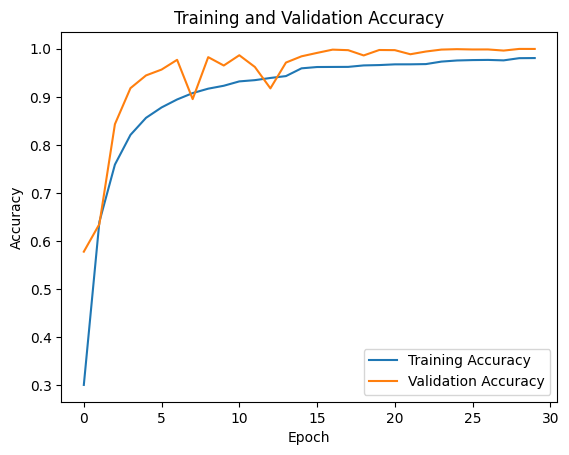

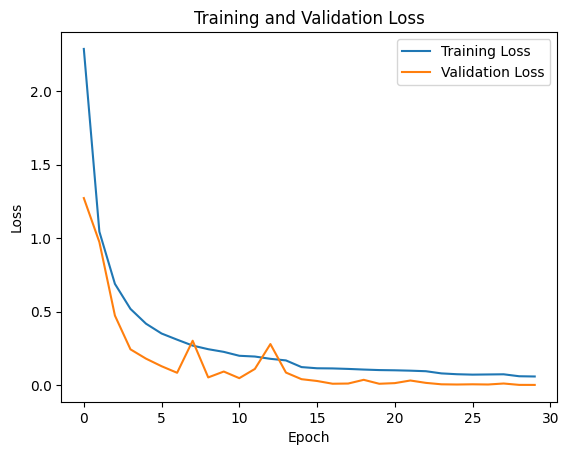

In [9]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:

file_path = "../dataset/asl_alphabet_test/A.jpg"  
# file_path = "./testwithmyhand/1.jpg"
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'delete', 'nothing', 'space']
img = image.load_img(file_path, target_size=(200, 200))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0
classes = model.predict(x)
predicted_class = np.argmax(classes, axis=1)[0]
print(f"Predicted Class: {labels[predicted_class]}")

# Export Model

- Export Model to Save Model

In [16]:
model.export('save_model/')


INFO:tensorflow:Assets written to: save_model/assets


INFO:tensorflow:Assets written to: save_model/assets


Saved artifact at 'save_model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 29), dtype=tf.float32, name=None)
Captures:
  2158021584752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2158034721200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2158034718736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2158034722608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2158034717680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2158034721376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2158034715216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2158034723312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2158034723664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2158034725248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2158034723840: TensorSpec(shape=(), dt

- Export to tensorflowlite

In [18]:
converter = tf.lite.TFLiteConverter.from_saved_model('save_model/')

tflite_model = converter.convert()

with open('../tflite_model/Model_SignLang.tflite','wb') as f:
    f.write(tflite_model)